In [ ]:
import sys
import os
from functions_sgp.data_transformations import build_player_stat_df

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from functions_nfl.import_nfl_readby_parquet import NFLDataLoader

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

from function_library.py_data_visualizations.eda_plots import correlation_heatmap

## Load Data and Perform Merges

In [11]:
seasons = [2023, 2024, 2025]

nfl_data_loader = NFLDataLoader()
pbp_import_df = nfl_data_loader.pbp(seasons)
schedule_import_df = nfl_data_loader.schedule(seasons)
player_weekly_import_df = nfl_data_loader.player_weekly(seasons)
team_weekly_import_df = nfl_data_loader.team_weekly(seasons)
depth_df = nfl_data_loader.depth_charts(seasons, schedule_import_df)
player_weekly_df = player_weekly_import_df.merge(depth_df, how='left', on=['season', 'week', 'team', 'player_id'])
player_stat_df = build_player_stat_df(schedule_df=schedule_import_df, player_weekly_df=player_weekly_df)

## Export DataFrames to .csv for "Hands-On" Verification

In [12]:
schedule_import_df.to_csv("csv_output/schedule.csv")
player_weekly_import_df.to_csv("csv_output/weekly_player_df.csv")
player_stat_df.to_csv("csv_output/player_stat_df.csv")

## Filter Quarterbacks who threw at least 5 passes and visualize feature corrleation

In [13]:
qb_df = player_stat_df[(player_stat_df['position']=='QB') & (player_stat_df['attempts']>5)]

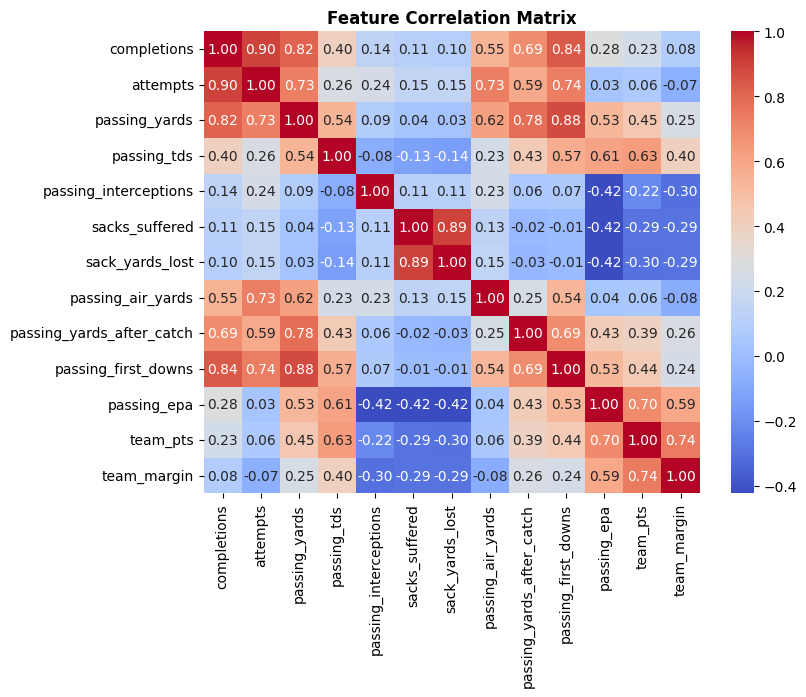

In [ ]:
correlation_heatmap(qb_df, ['completions', 'attempts', 'passing_yards', 'passing_tds', 'passing_interceptions', 'sacks_suffered', 'sack_yards_lost', 
                                      'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'team_pts', 'team_margin'])

### Filter down to relevant columns for the quarterback; want to attach to each receiver's output.

In [15]:
qb_sgp_df = qb_df[['game_id', 'season', 'week', 'stadium', 'gameday', 'overtime',
 'away_team', 'away_score', 'home_team', 'home_score', 'result', 'total',
 'team_pts', 'opp_pts', 'team_margin', 'away_moneyline', 'home_moneyline',
 'spread_line', 'total_line',
 'away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach',
 'player_id', 'player_name',
 'depth_rank', 'depth_position', 'position',
 'team', 'opponent_team',
 'completions', 'attempts', 'passing_yards', 'passing_tds', 'passing_interceptions',
 'sacks_suffered', 'sack_yards_lost', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
 'passing_first_downs', 'passing_epa', 'passing_cpoe', 'passing_2pt_conversions', 'pacr',
 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions']]

In [16]:
qb_sgp_df.to_csv('csv_output/qb_sgp_df.csv')

## Filter players with at least one target; combine with the quarterback's data from that game to study same game parlay

In [17]:
rec_df = player_stat_df[player_stat_df['targets']>0]

In [18]:
rec_df.to_csv('csv_output/rec_df.csv')